# Regression Task - Zomato Bangalore Restaurants
**Dataset:** Zomato Bangalore Restaurants

**Target Variable:** `rate` (restaurant rating)

**Models Used:** MLP Regressor, Linear Regression (Ridge), Random Forest Regressor

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("All libraries imported successfully!")

All libraries imported successfully!


## Load the Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataset/zomato.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {data.shape}")
data.head()

Dataset loaded successfully!
Shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Dataset Understanding
The Zomato Bangalore Restaurants dataset contains information about restaurants listed on Zomato in Bangalore. It includes features like cost, location, cuisine, services offered, and restaurant ratings.

**Input Features:** Cost for two, location, restaurant type, online ordering, table booking, cuisines, votes, etc.

**Target Variable:** `rate` - the restaurant rating (numeric, continuous after cleaning).

In [4]:
# List all features
print("Column Names:")
print(list(data.columns))
print(f"\nNumber of features: {data.shape[1]}")
print(f"Number of records: {data.shape[0]}")

# Data types
print("\nData Types:")
print(data.dtypes)

# Identify input features and target
print("\n--- Feature Roles ---")
print("Target variable: rate")
print("Input features: url, address, name, online_order, book_table, votes,")
print("                location, rest_type, dish_liked, cuisines, approx_cost(for two people),")
print("                reviews_list, menu_item, listed_in(type), listed_in(city), etc.")

Column Names:
['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

Number of features: 17
Number of records: 51717

Data Types:
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

--- Feature Roles ---
Target va

## Assess Missing Values, Outliers, and Consistency

In [5]:
# Missing values
print("=" * 60)
print("MISSING VALUES")
print("=" * 60)
null_counts = data.isnull().sum()
null_pct = (data.isnull().sum() / len(data)) * 100
null_table = pd.DataFrame({'Missing Count': null_counts, 'Percentage (%)': round(null_pct, 2)})
print(null_table[null_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Check the target column 'rate'
print("\n" + "=" * 60)
print("TARGET COLUMN (rate) INSPECTION")
print("=" * 60)
print(f"Unique values sample: {data['rate'].unique()[:20]}")
print(f"Total unique: {data['rate'].nunique()}")
print(f"Missing: {data['rate'].isnull().sum()}")

# Check for invalid entries in rate
print("\nValue counts for non-numeric rate entries:")

def check_valid_rate(val):
    try:
        float(str(val).split('/')[0])
        return True
    except:
        return False

bad_mask = ~data['rate'].apply(check_valid_rate)
print(data.loc[bad_mask, 'rate'].value_counts())

# Check approx_cost column
print("\n--- approx_cost(for two people) sample ---")
print(data['approx_cost(for two people)'].unique()[:15])

# Consistency note
print("\n--- Suitability Assessment ---")
print("- Target 'rate' contains entries like 'NEW', '-', and 'x/5' format that need cleaning.")
print("- approx_cost has commas that need removal.")
print("- Several categorical columns with high cardinality (cuisines, location, rest_type).")
print("- After cleaning, the dataset is suitable for regression.")

MISSING VALUES
                             Missing Count  Percentage (%)
dish_liked                           28078           54.29
rate                                  7775           15.03
phone                                 1208            2.34
approx_cost(for two people)            346            0.67
rest_type                              227            0.44
cuisines                                45            0.09
location                                21            0.04

TARGET COLUMN (rate) INSPECTION
Unique values sample: ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5']
Total unique: 64
Missing: 7775

Value counts for non-numeric rate entries:
rate
NEW    2208
-        69
Name: count, dtype: int64

--- approx_cost(for two people) sample ---
['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100']

--- Suitability Assessment ---
-

## EDA - Basic Inspection

In [6]:
print("--- First 5 Rows ---")
data.head()

--- First 5 Rows ---


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
print("--- Dataset Info ---")
data.info()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_li

In [8]:
print("--- Descriptive Statistics ---")
data.describe(include='all')

--- Descriptive Statistics ---


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/the-nest-the-...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning - Handle Missing Values and Invalid Ratings

In [9]:
# Step 1: Clean the target column 'rate'
print(f"Shape before cleaning rate: {data.shape}")

data = data.dropna(subset=['rate'])
data = data[~data['rate'].isin(['NEW', '-'])]
data['rate'] = data['rate'].apply(lambda x: float(str(x).split('/')[0].strip()))

print(f"Shape after cleaning rate: {data.shape}")
print(f"Rate range: {data['rate'].min()} to {data['rate'].max()}")
print(f"Rate mean: {data['rate'].mean():.2f}")

# Step 2: Clean approx_cost column
data['approx_cost(for two people)'] = (
    data['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)
data['approx_cost(for two people)'] = pd.to_numeric(
    data['approx_cost(for two people)'], errors='coerce'
)

# Step 3: Encode binary columns
data['online_order'] = data['online_order'].map({'Yes': 1, 'No': 0})
data['book_table'] = data['book_table'].map({'Yes': 1, 'No': 0})

# Step 4: Drop text/ID columns not useful for regression
remove_cols = ['url', 'address', 'name', 'phone', 'reviews_list',
               'menu_item', 'dish_liked']
remove_cols = [c for c in remove_cols if c in data.columns]
data = data.drop(columns=remove_cols)
print(f"\nShape after dropping text/ID columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

# Step 5: Handle missing values in remaining columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [c for c in numeric_columns if c != 'rate']

for col in numeric_columns:
    if data[col].isnull().sum() > 0:
        med = data[col].median()
        data[col] = data[col].fillna(med)
        print(f"Filled '{col}' missing with median: {med}")

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        most_common = data[col].mode()[0]
        data[col] = data[col].fillna(most_common)
        print(f"Filled '{col}' missing with mode: {most_common}")

print(f"\nRemaining missing values: {data.isnull().sum().sum()}")
print(f"Final cleaned shape: {data.shape}")

Shape before cleaning rate: (51717, 17)
Shape after cleaning rate: (41665, 17)
Rate range: 1.8 to 4.9
Rate mean: 3.70

Shape after dropping text/ID columns: (41665, 10)
Remaining columns: ['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']
Filled 'approx_cost(for two people)' missing with median: 500.0
Filled 'rest_type' missing with mode: Quick Bites
Filled 'cuisines' missing with mode: North Indian

Remaining missing values: 0
Final cleaned shape: (41665, 10)


## EDA - Target Variable Distribution

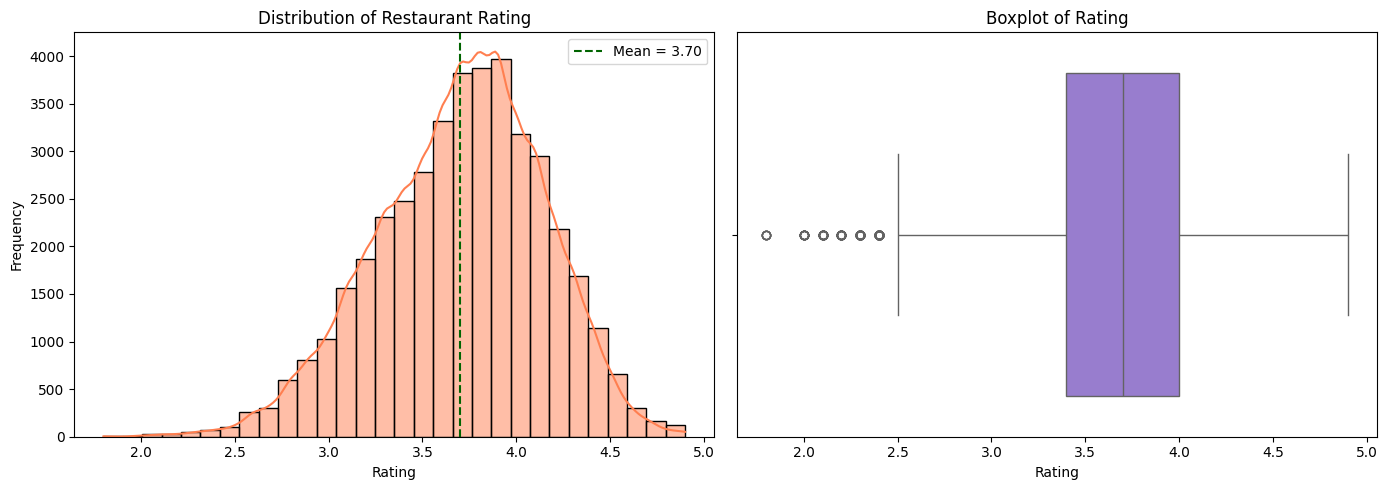

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(data['rate'], bins=30, kde=True, ax=axes[0], color='coral')
axes[0].set_title('Distribution of Restaurant Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].axvline(data['rate'].mean(), color='darkgreen', linestyle='--',
                label=f"Mean = {data['rate'].mean():.2f}")
axes[0].legend()

# Boxplot
sns.boxplot(x=data['rate'], ax=axes[1], color='mediumpurple')
axes[1].set_title('Boxplot of Rating')
axes[1].set_xlabel('Rating')

plt.tight_layout()
plt.show()

## EDA - Boxplots for Numerical Features

Numerical features for boxplots: ['online_order', 'book_table', 'votes', 'approx_cost(for two people)']


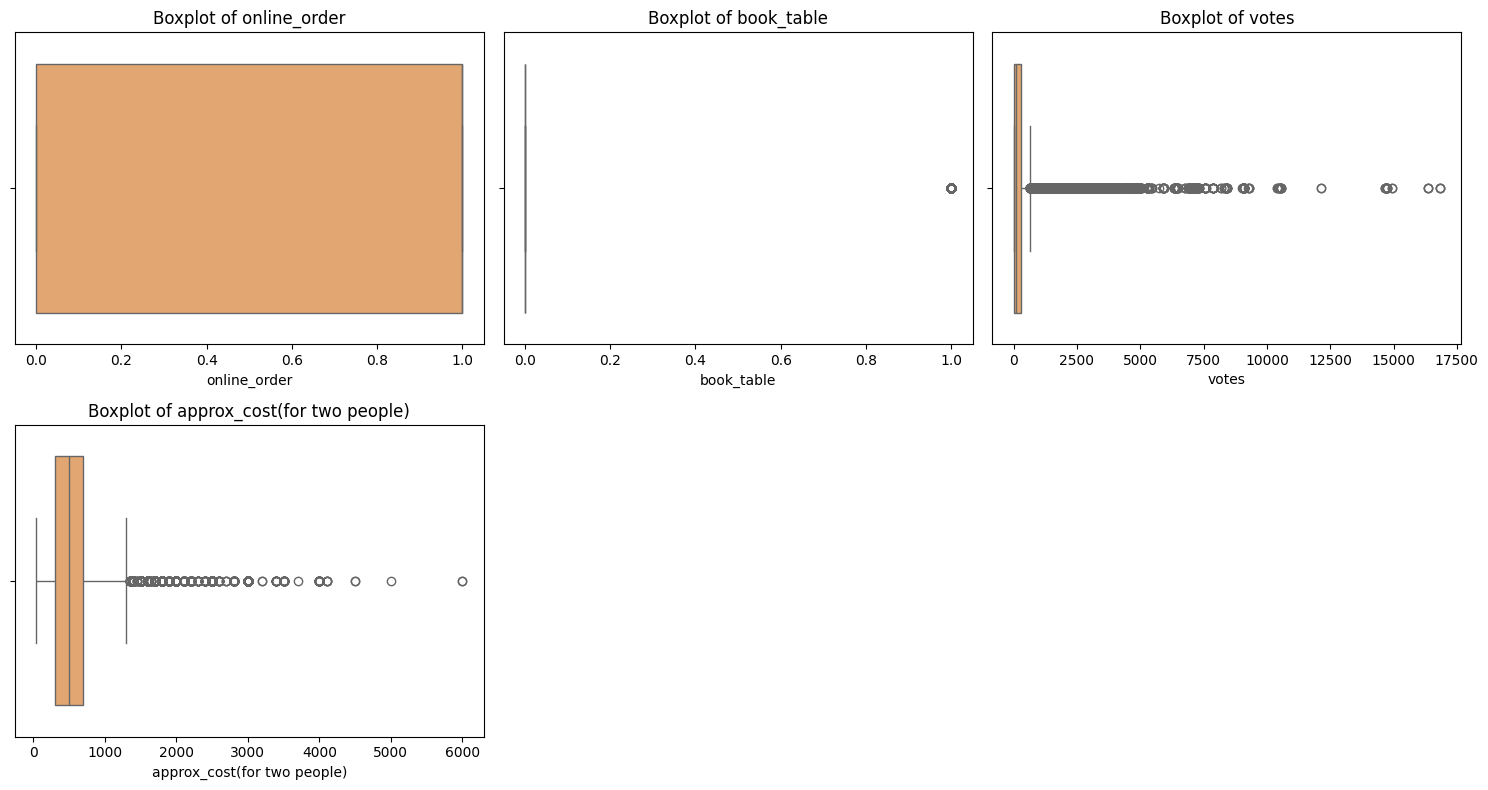

In [11]:
numeric_feats = data.select_dtypes(include=[np.number]).columns.tolist()
box_features = [c for c in numeric_feats if c != 'rate']

print(f"Numerical features for boxplots: {box_features}")

n_cols_plot = 3
n_rows_plot = max(1, (len(box_features) + n_cols_plot - 1) // n_cols_plot)

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(5 * n_cols_plot, 4 * n_rows_plot))
if n_rows_plot == 1 and n_cols_plot == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(box_features):
    sns.boxplot(x=data[col], ax=axes[i], color='sandybrown')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## EDA - Correlation Heatmap

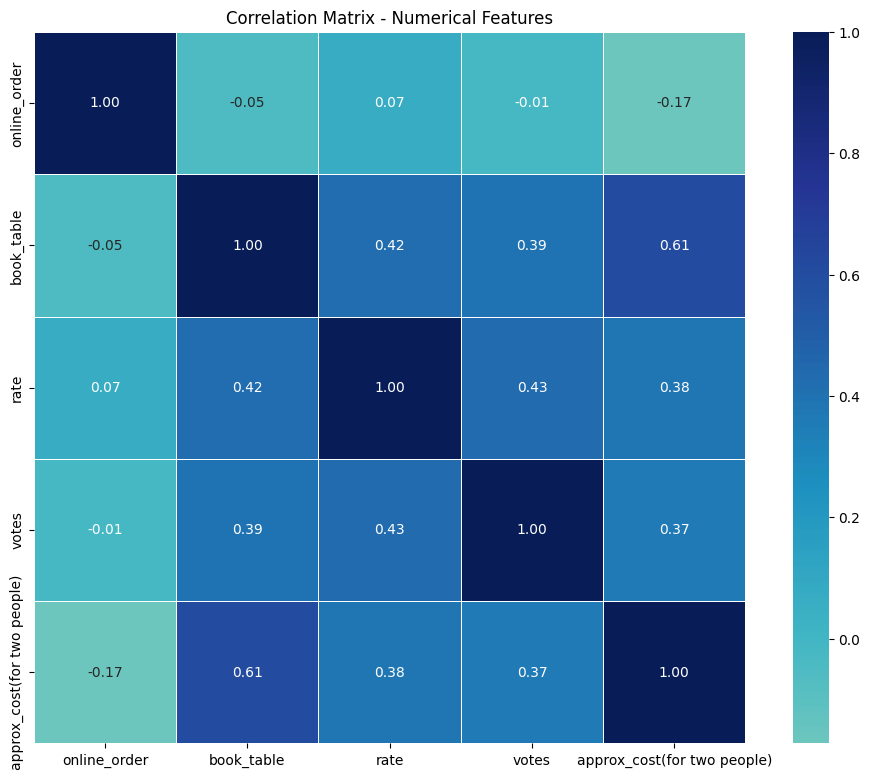

In [12]:
corr_features = data.select_dtypes(include=[np.number]).columns.tolist()
corr_table = data[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, fmt='.2f', cmap='YlGnBu',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

## EDA - Scatter Plots (Features vs Rating)

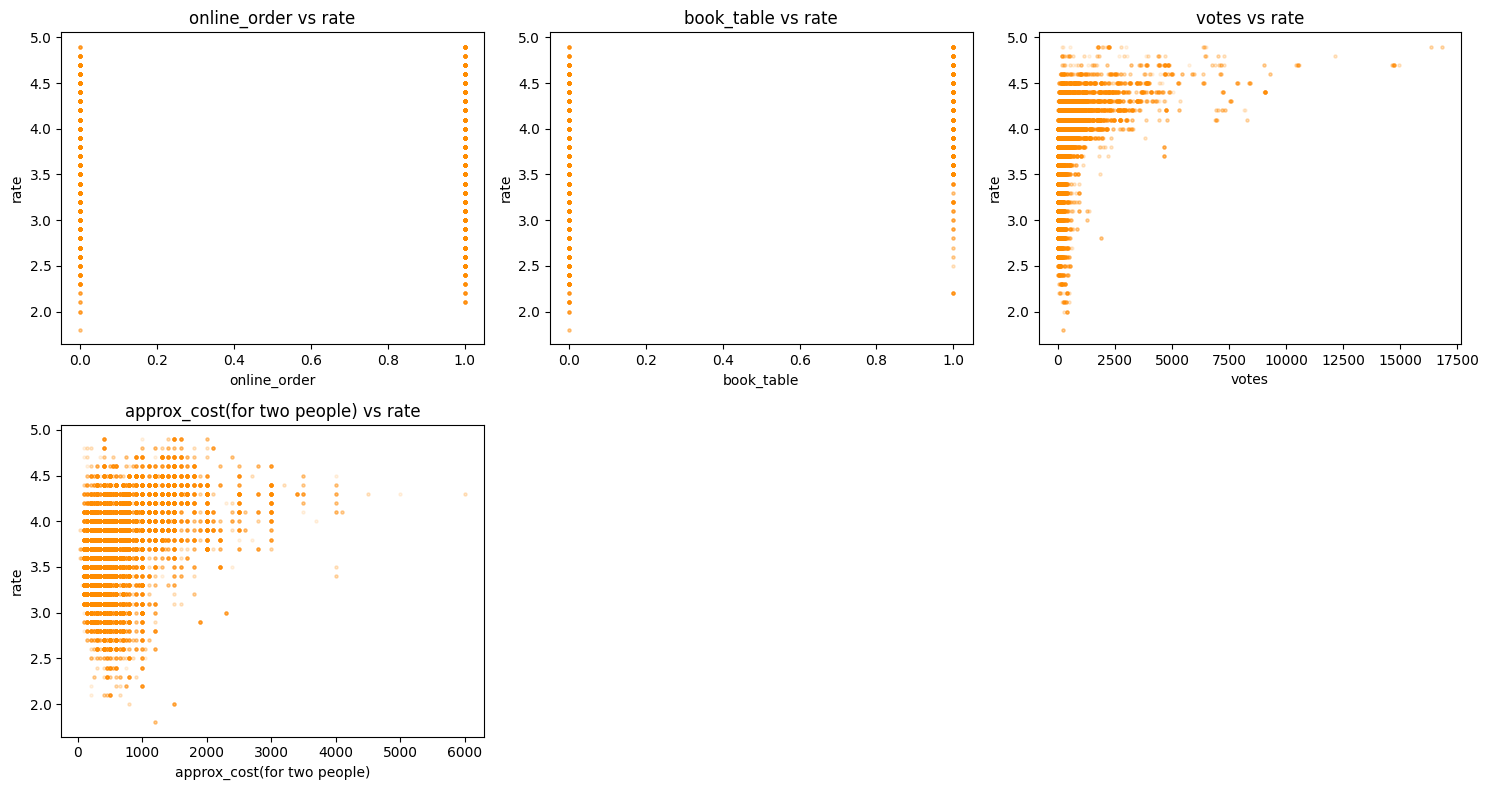

--- Modeling Implications ---
- votes and approx_cost show some correlation with rate.
- online_order and book_table are binary and may have modest predictive power.
- High cardinality categorical features will need encoding.
- Outliers in cost and votes may affect linear models; tree models are more robust.


In [13]:
scatter_cols = [c for c in data.select_dtypes(include=[np.number]).columns if c != 'rate']

n_cols_plot = 3
n_rows_plot = max(1, (len(scatter_cols) + n_cols_plot - 1) // n_cols_plot)

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(5 * n_cols_plot, 4 * n_rows_plot))
if n_rows_plot == 1 and n_cols_plot == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(scatter_cols):
    axes[i].scatter(data[col], data['rate'], alpha=0.1, s=5, color='darkorange')
    axes[i].set_title(f'{col} vs rate')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('rate')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

print("--- Modeling Implications ---")
print("- votes and approx_cost show some correlation with rate.")
print("- online_order and book_table are binary and may have modest predictive power.")
print("- High cardinality categorical features will need encoding.")
print("- Outliers in cost and votes may affect linear models; tree models are more robust.")

## Preprocessing - Encode, Scale, and Split

In [14]:
# Label encode remaining categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_columns}")

encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col].astype(str))
    encoders[col] = encoder
    print(f"  Encoded '{col}': {len(encoder.classes_)} classes")

# Separate features and target
features = data.drop(columns=['rate'])
target = data['rate']

col_names = features.columns.tolist()
print(f"\nTotal features: {len(col_names)}")
print(f"Features: {col_names}")

# Scale features
std_scaler = StandardScaler()
features_scaled = pd.DataFrame(std_scaler.fit_transform(features), columns=col_names, index=features.index)

# 80/20 Train-Test Split
train_x, test_x, train_y, test_y = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

print(f"\nTraining set: {train_x.shape}")
print(f"Test set: {test_x.shape}")
print(f"\ntrain_y - Mean: {train_y.mean():.3f}, Std: {train_y.std():.3f}")
print(f"test_y  - Mean: {test_y.mean():.3f}, Std: {test_y.std():.3f}")

Categorical columns to encode: ['location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']
  Encoded 'location': 92 classes
  Encoded 'rest_type': 87 classes
  Encoded 'cuisines': 2383 classes
  Encoded 'listed_in(type)': 7 classes
  Encoded 'listed_in(city)': 30 classes

Total features: 9
Features: ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']

Training set: (33332, 9)
Test set: (8333, 9)

train_y - Mean: 3.702, Std: 0.441
test_y  - Mean: 3.695, Std: 0.440


## Evaluation Helper Function
Computes MSE, RMSE, MAE, and R² for both train and test sets.

In [15]:
def calculate_reg_scores(model_label, actual_train, pred_train, actual_test, pred_test):
    """
    Evaluate regression model on train and test sets.
    Returns a dictionary with MSE, RMSE, MAE, and R² for both splits.
    """
    scores = {}

    for split, actual, pred in [('Train', actual_train, pred_train),
                                 ('Test', actual_test, pred_test)]:
        mse = mean_squared_error(actual, pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)

        scores[f'{split}_MSE'] = round(mse, 4)
        scores[f'{split}_RMSE'] = round(rmse, 4)
        scores[f'{split}_MAE'] = round(mae, 4)
        scores[f'{split}_R2'] = round(r2, 4)

        print(f"  {split} - MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

    scores['Model'] = model_label
    return scores

print("Evaluation helper defined.")

Evaluation helper defined.


## Model 1 - MLP Regressor

In [16]:
print("=" * 60)
print("MODEL 1: MLP REGRESSOR (Neural Network)")
print("=" * 60)

# Architecture: Input -> 128 -> 64 -> 32 -> Output(1)
nn_reg = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    learning_rate='adaptive',
    learning_rate_init=0.001
)

print("Architecture: Input -> 128 -> 64 -> 32 -> Output(1)")
print("Activation: ReLU")
print("Loss: Squared Error (default)")
print("Optimizer: Adam")
print("Learning Rate: 0.001 (adaptive)")
print("Early Stopping: True")

nn_reg.fit(train_x, train_y)
print(f"\nTraining completed in {nn_reg.n_iter_} iterations.")

# Predictions
nn_train_pred = nn_reg.predict(train_x)
nn_test_pred = nn_reg.predict(test_x)

# Cross-validation score
nn_cv = cross_val_score(nn_reg, train_x, train_y, cv=5, scoring='neg_mean_squared_error')
nn_cv_rmse = np.sqrt(-nn_cv.mean())
print(f"CV RMSE (5-fold): {nn_cv_rmse:.4f}")

# Evaluate
print("\n--- Metrics ---")
nn_scores = calculate_reg_scores('MLP Regressor', train_y, nn_train_pred, test_y, nn_test_pred)
nn_scores['CV_RMSE'] = round(nn_cv_rmse, 4)
nn_scores['Num_Features'] = train_x.shape[1]

MODEL 1: MLP REGRESSOR (Neural Network)
Architecture: Input -> 128 -> 64 -> 32 -> Output(1)
Activation: ReLU
Loss: Squared Error (default)
Optimizer: Adam
Learning Rate: 0.001 (adaptive)
Early Stopping: True

Training completed in 40 iterations.
CV RMSE (5-fold): 0.3096

--- Metrics ---
  Train - MSE: 0.0961 | RMSE: 0.3099 | MAE: 0.2280 | R²: 0.5054
  Test - MSE: 0.0997 | RMSE: 0.3158 | MAE: 0.2333 | R²: 0.4846


## Model 2 - Linear Regression (Ridge)

In [17]:
print("=" * 60)
print("MODEL 2: LINEAR REGRESSION (Ridge)")
print("=" * 60)

# Step 1: Baseline
print("\n--- Step 1: Baseline Model ---")
lin_base = LinearRegression()
lin_base.fit(train_x, train_y)
lin_base_pred = lin_base.predict(test_x)
print(f"  Baseline Test R²: {r2_score(test_y, lin_base_pred):.4f}")
print(f"  Baseline Test RMSE: {np.sqrt(mean_squared_error(test_y, lin_base_pred)):.4f}")

# Step 2: Hyperparameter tuning with Ridge
print("\n--- Step 2: Hyperparameter Tuning (Ridge with GridSearchCV) ---")
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_grid = GridSearchCV(
    Ridge(random_state=42), ridge_params,
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)
ridge_grid.fit(train_x, train_y)
print(f"  Best alpha: {ridge_grid.best_params_}")
ridge_cv_rmse = np.sqrt(-ridge_grid.best_score_)
print(f"  Best CV RMSE: {ridge_cv_rmse:.4f}")

# Step 3: Feature Selection using RFE
print("\n--- Step 3: Feature Selection (RFE) ---")
ridge_best = ridge_grid.best_estimator_
n_select = min(10, train_x.shape[1])
lin_rfe = RFE(estimator=Ridge(alpha=ridge_grid.best_params_['alpha']),
              n_features_to_select=n_select, step=1)
lin_rfe.fit(train_x, train_y)

lin_selected_cols = [f for f, s in zip(col_names, lin_rfe.support_) if s]
print(f"  Selected {len(lin_selected_cols)} features: {lin_selected_cols}")

# Step 4: Retrain with selected features
print("\n--- Step 4: Retrain Final Model ---")
train_x_lin = train_x[lin_selected_cols]
test_x_lin = test_x[lin_selected_cols]

lin_model = Ridge(alpha=ridge_grid.best_params_['alpha'], random_state=42)
lin_model.fit(train_x_lin, train_y)

# Predictions
lin_train_pred = lin_model.predict(train_x_lin)
lin_test_pred = lin_model.predict(test_x_lin)

# Evaluate
print("\n--- Metrics ---")
lin_scores = calculate_reg_scores('Linear Regression (Ridge)', train_y, lin_train_pred,
                                   test_y, lin_test_pred)
lin_scores['CV_RMSE'] = round(ridge_cv_rmse, 4)
lin_scores['Num_Features'] = len(lin_selected_cols)

MODEL 2: LINEAR REGRESSION (Ridge)

--- Step 1: Baseline Model ---
  Baseline Test R²: 0.2929
  Baseline Test RMSE: 0.3699

--- Step 2: Hyperparameter Tuning (Ridge with GridSearchCV) ---
  Best alpha: {'alpha': 100.0}
  Best CV RMSE: 0.3689

--- Step 3: Feature Selection (RFE) ---
  Selected 9 features: ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']

--- Step 4: Retrain Final Model ---

--- Metrics ---
  Train - MSE: 0.1360 | RMSE: 0.3687 | MAE: 0.2851 | R²: 0.2998
  Test - MSE: 0.1368 | RMSE: 0.3699 | MAE: 0.2873 | R²: 0.2929


## Model 3 - Random Forest Regressor

MODEL 3: RANDOM FOREST REGRESSOR

--- Step 1: Baseline Model ---
  Baseline Test R²: 0.9240
  Baseline Test RMSE: 0.1213

--- Step 2: Hyperparameter Tuning (GridSearchCV) ---
  Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Best CV RMSE: 0.1467

--- Step 3: Feature Selection (Feature Importances) ---

Feature Importances:
                    Feature  Importance
                      votes    0.525316
                   cuisines    0.157927
                   location    0.102169
approx_cost(for two people)    0.092836
                  rest_type    0.054661
            listed_in(city)    0.026119
                 book_table    0.018548
               online_order    0.016890
            listed_in(type)    0.005535

  Selected 2 features (importance > mean=0.1111):
  ['votes', 'cuisines']


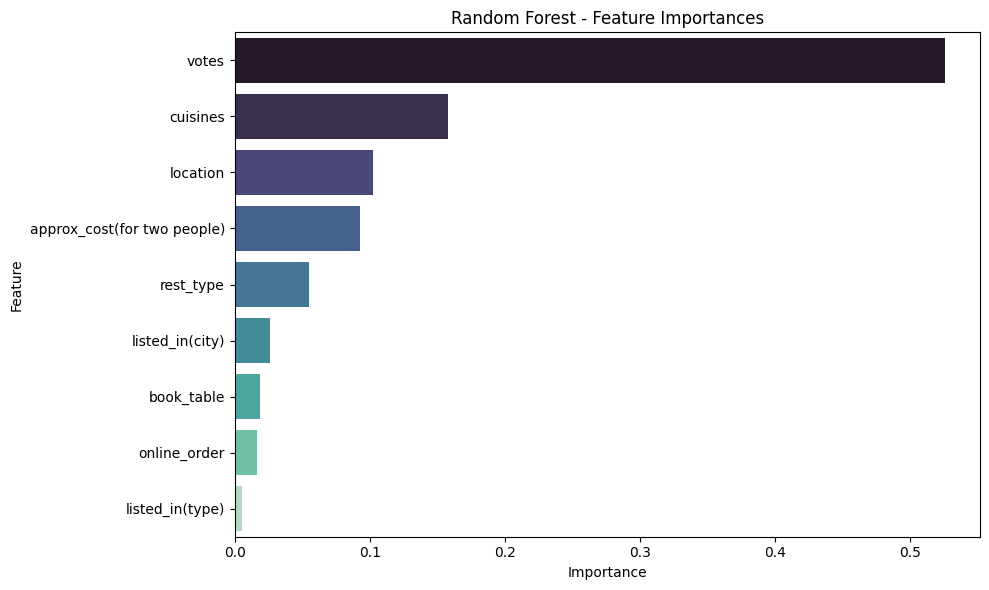


--- Step 4: Retrain Final Model ---

--- Metrics ---
  Train - MSE: 0.0132 | RMSE: 0.1150 | MAE: 0.0531 | R²: 0.9319
  Test - MSE: 0.0302 | RMSE: 0.1737 | MAE: 0.0855 | R²: 0.8441


In [18]:
print("=" * 60)
print("MODEL 3: RANDOM FOREST REGRESSOR")
print("=" * 60)

# Step 1: Baseline
print("\n--- Step 1: Baseline Model ---")
rf_base = RandomForestRegressor(random_state=42, n_estimators=100)
rf_base.fit(train_x, train_y)
rf_base_pred = rf_base.predict(test_x)
print(f"  Baseline Test R²: {r2_score(test_y, rf_base_pred):.4f}")
print(f"  Baseline Test RMSE: {np.sqrt(mean_squared_error(test_y, rf_base_pred)):.4f}")

# Step 2: Hyperparameter Tuning
print("\n--- Step 2: Hyperparameter Tuning (GridSearchCV) ---")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params, cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=0
)
rf_grid.fit(train_x, train_y)
print(f"  Best Parameters: {rf_grid.best_params_}")
rf_cv_rmse = np.sqrt(-rf_grid.best_score_)
print(f"  Best CV RMSE: {rf_cv_rmse:.4f}")

# Step 3: Feature Selection using Feature Importances
print("\n--- Step 3: Feature Selection (Feature Importances) ---")
rf_best = rf_grid.best_estimator_
feat_imp = rf_best.feature_importances_

imp_table = pd.DataFrame({
    'Feature': col_names,
    'Importance': feat_imp
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(imp_table.to_string(index=False))

# Select features above mean importance
avg_imp = feat_imp.mean()
rf_selected_cols = imp_table[imp_table['Importance'] > avg_imp]['Feature'].tolist()
print(f"\n  Selected {len(rf_selected_cols)} features (importance > mean={avg_imp:.4f}):")
print(f"  {rf_selected_cols}")

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_table, palette='mako')
plt.title('Random Forest - Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Step 4: Retrain with selected features
print("\n--- Step 4: Retrain Final Model ---")
train_x_rf = train_x[rf_selected_cols]
test_x_rf = test_x[rf_selected_cols]

rf_model = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
rf_model.fit(train_x_rf, train_y)

# Predictions
rf_train_pred = rf_model.predict(train_x_rf)
rf_test_pred = rf_model.predict(test_x_rf)

# Evaluate
print("\n--- Metrics ---")
rf_scores = calculate_reg_scores('Random Forest', train_y, rf_train_pred,
                                  test_y, rf_test_pred)
rf_scores['CV_RMSE'] = round(rf_cv_rmse, 4)
rf_scores['Num_Features'] = len(rf_selected_cols)

## Model Comparison Table

In [19]:
print("=" * 80)
print("FINAL MODEL COMPARISON TABLE")
print("=" * 80)

all_scores = [nn_scores, lin_scores, rf_scores]

results = {
    'Model': [s['Model'] for s in all_scores],
    'Features Used': [s['Num_Features'] for s in all_scores],
    'CV RMSE': [s['CV_RMSE'] for s in all_scores],
    'Train MSE': [s['Train_MSE'] for s in all_scores],
    'Train RMSE': [s['Train_RMSE'] for s in all_scores],
    'Train MAE': [s['Train_MAE'] for s in all_scores],
    'Train R²': [s['Train_R2'] for s in all_scores],
    'Test MSE': [s['Test_MSE'] for s in all_scores],
    'Test RMSE': [s['Test_RMSE'] for s in all_scores],
    'Test MAE': [s['Test_MAE'] for s in all_scores],
    'Test R²': [s['Test_R2'] for s in all_scores],
}

results_table = pd.DataFrame(results)
print(results_table.to_string(index=False))

# Identify best model based on Test R²
best_idx = results_table['Test R²'].idxmax()
best_name = results_table.loc[best_idx, 'Model']
best_r2 = results_table.loc[best_idx, 'Test R²']
best_rmse = results_table.loc[best_idx, 'Test RMSE']

print(f"\n{'=' * 80}")
print(f"BEST MODEL: {best_name}")
print(f"  Test R²:   {best_r2}")
print(f"  Test RMSE: {best_rmse}")
print(f"{'=' * 80}")

FINAL MODEL COMPARISON TABLE
                    Model  Features Used  CV RMSE  Train MSE  Train RMSE  Train MAE  Train R²  Test MSE  Test RMSE  Test MAE  Test R²
            MLP Regressor              9   0.3096     0.0961      0.3099     0.2280    0.5054    0.0997     0.3158    0.2333   0.4846
Linear Regression (Ridge)              9   0.3689     0.1360      0.3687     0.2851    0.2998    0.1368     0.3699    0.2873   0.2929
            Random Forest              2   0.1467     0.0132      0.1150     0.0531    0.9319    0.0302     0.1737    0.0855   0.8441

BEST MODEL: Random Forest
  Test R²:   0.8441
  Test RMSE: 0.1737


## Final Comparison - Bar Charts

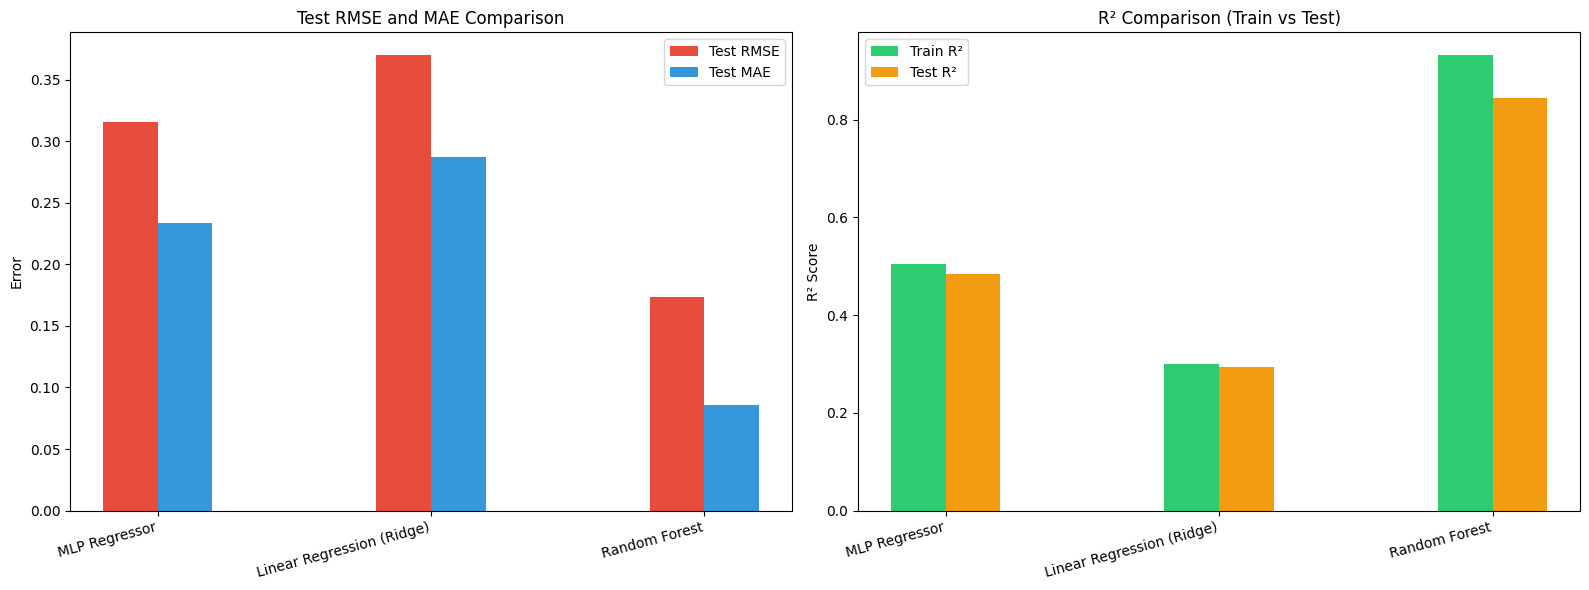


Regression task completed successfully!


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

model_names = results_table['Model'].tolist()
x = np.arange(len(model_names))
width = 0.2

# Test RMSE and MAE
axes[0].bar(x - width/2, results_table['Test RMSE'], width, label='Test RMSE', color='#e74c3c')
axes[0].bar(x + width/2, results_table['Test MAE'], width, label='Test MAE', color='#3498db')
axes[0].set_title('Test RMSE and MAE Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=15, ha='right')
axes[0].legend()
axes[0].set_ylabel('Error')

# R² Comparison (Train vs Test)
axes[1].bar(x - width/2, results_table['Train R²'], width, label='Train R²', color='#2ecc71')
axes[1].bar(x + width/2, results_table['Test R²'], width, label='Test R²', color='#f39c12')
axes[1].set_title('R² Comparison (Train vs Test)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=15, ha='right')
axes[1].legend()
axes[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()

print("\nRegression task completed successfully!")